### Exploratory analysis for the test data on BRSet
> Rodrigo de Castro Michelassi
>
> Instituto de Matemática e Estatística (IME-USP)


In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt

### Importing dataset dependencies


In [2]:
labels_path = '/home/rodrigocm/scratch/datasets/brset/labels.csv'
images_path = '/home/rodrigocm/scratch/datasets/brset/selected_photos/test'

images = set()
adequate_images = os.listdir(os.path.join(images_path, 'adequate'))
inadequate_images = os.listdir(os.path.join(images_path, 'inadequate'))

for file in adequate_images:
    images.add(file)
for file in inadequate_images:
    images.add(file)
images=[x.split('.')[0] for x in images]

df = pd.read_csv(labels_path, sep=',')
df.head()

,image_id,patient_id,camera,patient_age,comorbidities,diabetes_time_y,insuline,patient_sex,exam_eye,diabetes,...,amd,vascular_occlusion,hypertensive_retinopathy,drusens,hemorrhage,retinal_detachment,myopic_fundus,increased_cup_disc,other,quality
0,img00001,1,Canon CR,48.0,diabetes1,12,yes,1,1,yes,...,0,0,0,0,0,0,0,1,0,Adequate
1,img00002,1,Canon CR,48.0,diabetes1,12,yes,1,2,yes,...,0,0,0,0,0,0,0,1,0,Adequate
2,img00003,2,Canon CR,18.0,diabetes1,7,yes,2,1,yes,...,0,0,0,0,0,0,0,0,0,Adequate
3,img00004,2,Canon CR,18.0,diabetes1,7,yes,2,2,yes,...,0,0,0,0,0,0,0,0,0,Adequate
4,img00005,3,Canon CR,22.0,diabetes1,11,yes,1,1,yes,...,0,0,0,0,0,0,0,0,0,Adequate


In [3]:
# checking if all the test dataset was correctly imported
print(len(images))

1627


### Dropping images that are not on the test data


In [ ]:
df = df[df['image_id'].isin(images)].reset_index(drop=True)

df.head()

,image_id,patient_id,camera,patient_age,comorbidities,diabetes_time_y,insuline,patient_sex,exam_eye,diabetes,...,amd,vascular_occlusion,hypertensive_retinopathy,drusens,hemorrhage,retinal_detachment,myopic_fundus,increased_cup_disc,other,quality
0,img00004,2,Canon CR,18.0,diabetes1,7,yes,2,2,yes,...,0,0,0,0,0,0,0,0,0,Adequate
1,img00009,5,Canon CR,23.0,diabetes1,20,yes,1,1,yes,...,0,0,0,0,0,0,0,0,0,Adequate
2,img00020,10,Canon CR,37.0,diabetes1,3,yes,1,2,yes,...,0,0,0,0,0,0,0,1,0,Adequate
3,img00028,14,Canon CR,20.0,diabetes1,14,yes,2,2,yes,...,0,0,0,0,0,0,0,0,0,Adequate
4,img00047,24,Canon CR,13.0,diabetes1,3,yes,2,1,yes,...,0,0,0,0,0,0,0,0,0,Adequate


In [5]:
adequate_lst = []
focus_lst = []
ilumination_lst = []
image_field_lst = []
artifacts_lst = []

for _, row in df.iterrows():
    if row['quality'] == 'Adequate':
        adequate_lst.append(row['image_id'])
    if row['focus'] == 2:
        focus_lst.append(row['image_id'])
    if row['iluminaton'] == 2:
        ilumination_lst.append(row['image_id'])
    if row['image_field'] == 2:
        image_field_lst.append(row['image_id'])
    if row['artifacts'] == 2:
        artifacts_lst.append(row['image_id'])

print(f'{len(focus_lst)}, {len(ilumination_lst)}, {len(image_field_lst)}, {len(artifacts_lst)}')

59, 10, 151, 9


### Defining and plotting proportions for visual understanding

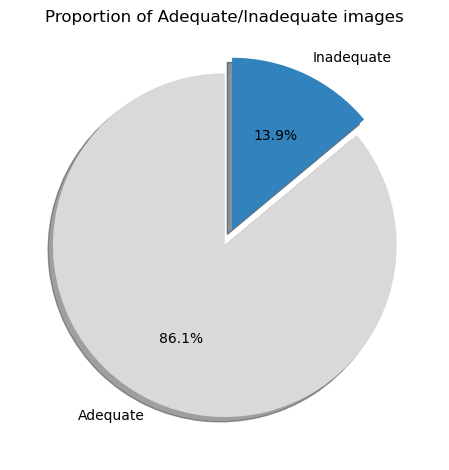

In [6]:
labels_count = [len(adequate_lst), len(focus_lst) + len(ilumination_lst) + len(image_field_lst) + len(artifacts_lst)]
labels = ['Adequate', 'Inadequate']

my_cmap = plt.get_cmap("tab20c")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(labels_count, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90, colors=my_cmap(rescale(labels_count)))
plt.title("Proportion of Adequate/Inadequate images", fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

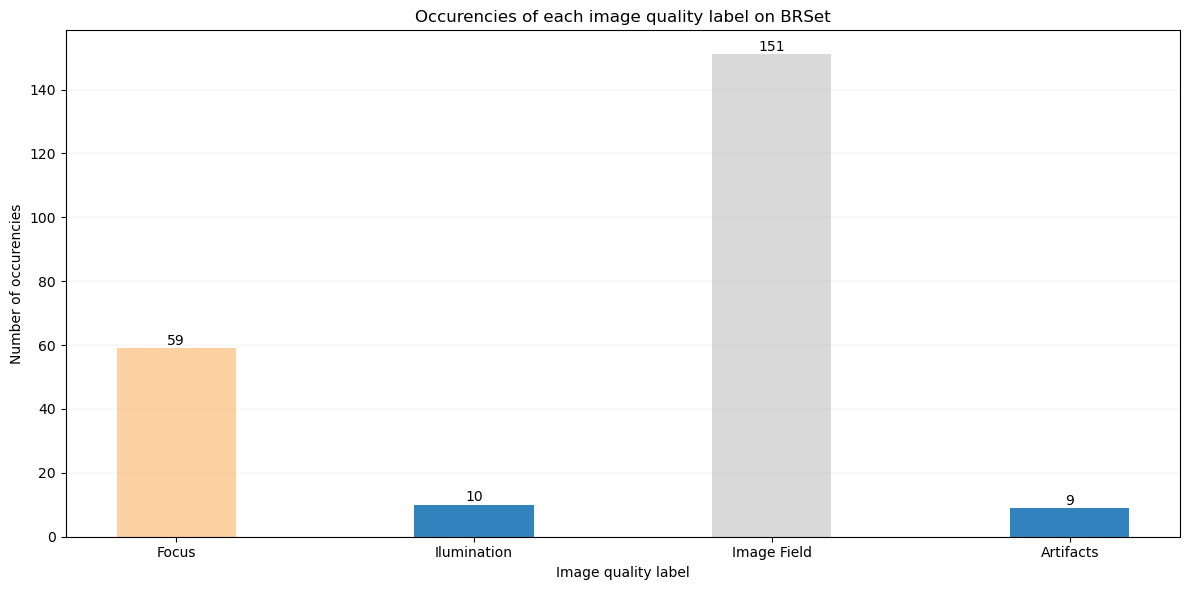

In [7]:
labels_count = [len(focus_lst), len(ilumination_lst), len(image_field_lst), len(artifacts_lst)]
labels = ['Focus', 'Ilumination', 'Image Field', 'Artifacts']

plt.clf()
plt.figure(figsize=(12,6))
plt.bar(labels, labels_count, width=0.4, color=my_cmap(rescale(labels_count)))
plt.grid(linestyle='--', linewidth=0.15, axis='y')
plt.xlabel("Image quality label")
plt.ylabel("Number of occurencies")
plt.title("Occurencies of each image quality label on BRSet")
for i, val in enumerate(labels_count):
    plt.text(i, val + 0.1, str(val), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [8]:
for i in range(len(adequate_images)):
    adequate_lst[i] += '.jpg'

for i in range(len(focus_lst)):
    focus_lst[i] += '.jpg'

for i in range(len(ilumination_lst)):
    ilumination_lst[i] += '.jpg'

for i in range(len(image_field_lst)):
    image_field_lst[i] += '.jpg'

for i in range(len(artifacts_lst)):
    artifacts_lst[i] += '.jpg'

### Visualizing images without GradCAM

#### In order to understand what which label is referring to:

> **Focus:** This parameter is graded as adequate when the focus is sufficient to identify third-generation branches within one optic disc diameter around the macula.
>
> **Illumination:** This parameter is graded as adequate when both of the following requirements are met: 
> 1) Absence of dark, bright, or washed-out areas that interfere with detailed grading; 
> 2) In the case of peripheral shadows (e.g., due to pupillary constriction) the readable part should reach more than 80% of the whole image.
>
> **Image Field:** This parameter is graded as adequate when all the following requirements are met: 
> 1) The optic disc is at least 1 disc diameter (DD) from the nasal edge; 
> 2) The macular center is at least 2 DD from the temporal edge; 
> 3) The superior and inferior temporal arcades are visible in a length of at least 2 DD.
>
> **Artifacts:** The following artifacts are considered: haze, dust, and dirt. This parameter is graded as adequate when the image is sufficiently artifact-free to allow adequate grading.

[Visualization of Retinal regions](https://d2jx2rerrg6sh3.cloudfront.net/image-handler/ts/20190228063020/ri/673/picture/2019/2/optic_disc_swelling.jpg)

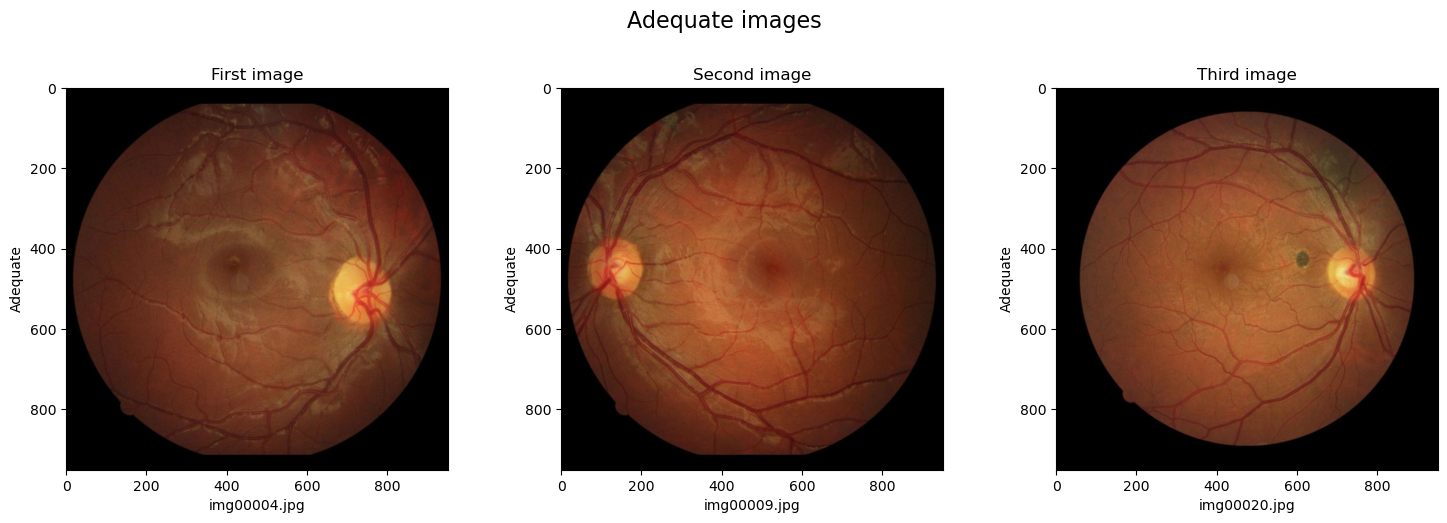

<Figure size 640x480 with 0 Axes>

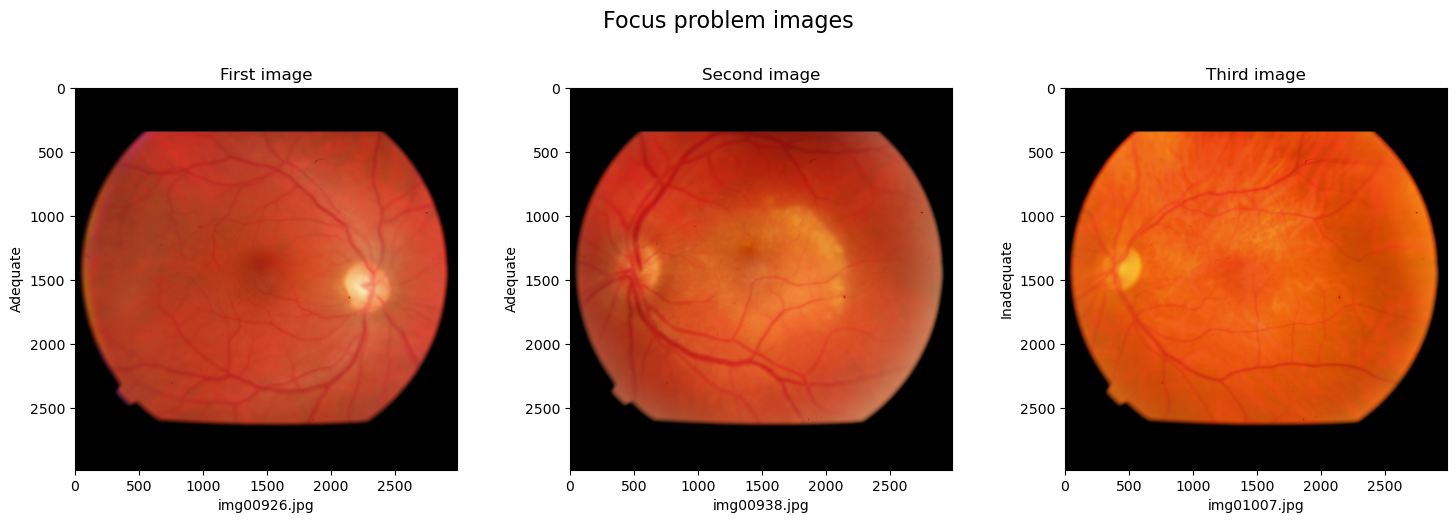

<Figure size 640x480 with 0 Axes>

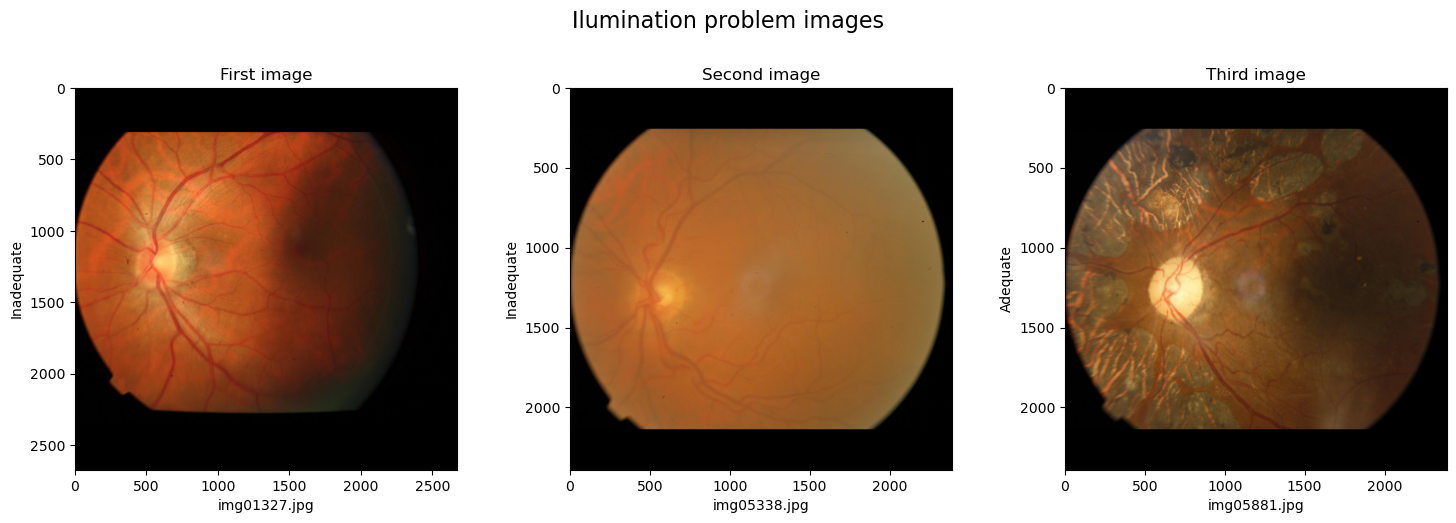

<Figure size 640x480 with 0 Axes>

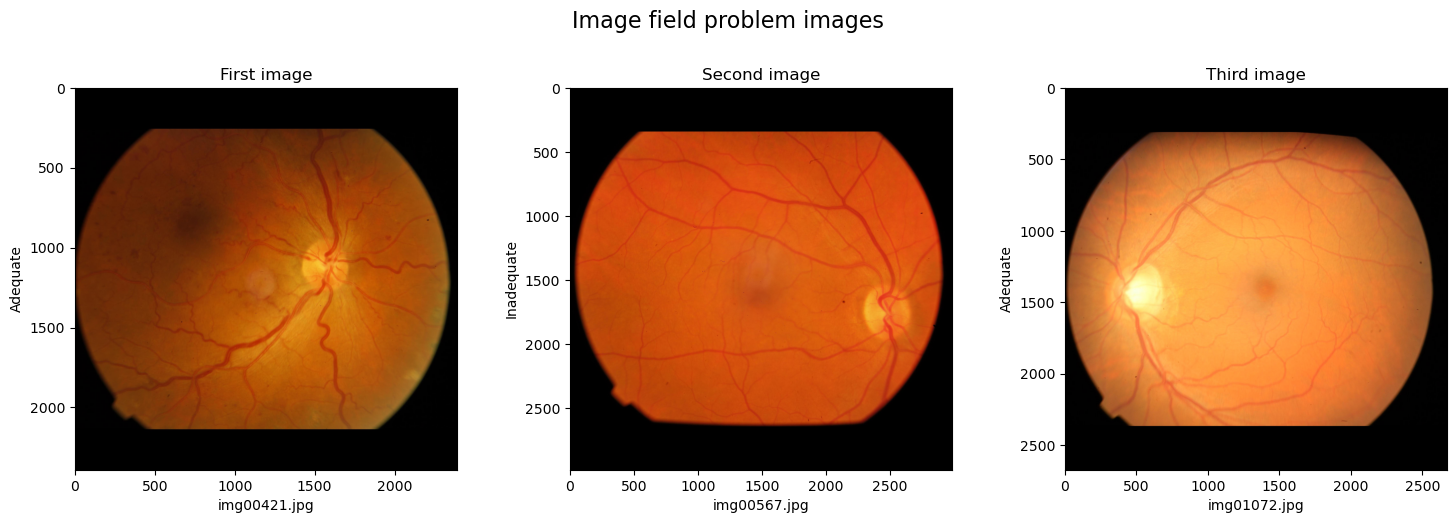

<Figure size 640x480 with 0 Axes>

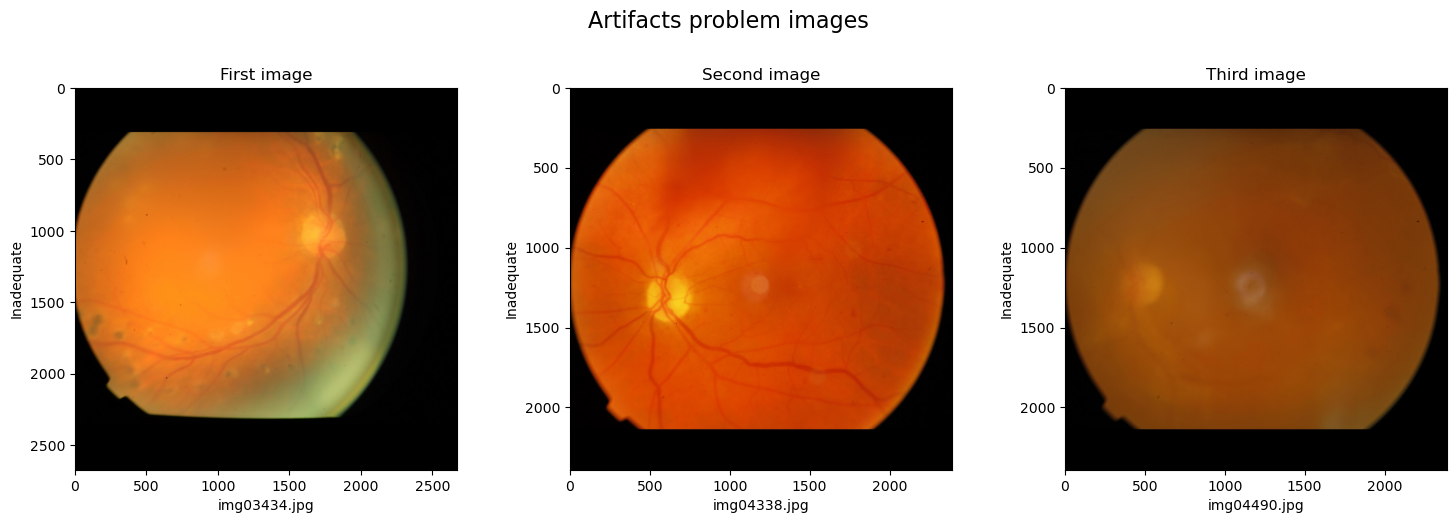

<Figure size 640x480 with 0 Axes>

In [11]:
class_names = {0: "Inadequate", 1: "Adequate"}

adequate_images = os.path.join(images_path, 'adequate')
inadequate_images = os.path.join(images_path, 'inadequate')

def plot_three_images(img_names, title, img_path, predictions):
    first = img_names[0]; first = os.path.join(img_path, first)
    second = img_names[1]; second = os.path.join(img_path, second)
    third = img_names[2]; third = os.path.join(img_path, third)

    first_img = Image.open(first)
    second_img = Image.open(second)
    third_img = Image.open(third)

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5)) 

    ax1.set_title("First image")
    ax1.set_xlabel(img_names[0])
    ax1.set_ylabel(class_names[predictions[0]])
    ax1.imshow(np.rot90(first_img, 2))

    ax2.set_title("Second image")
    ax2.set_xlabel(img_names[1])
    ax2.set_ylabel(class_names[predictions[1]])
    ax2.imshow(np.rot90(second_img, 2))

    ax3.set_title("Third image")
    ax3.set_xlabel(img_names[2])
    ax3.set_ylabel(class_names[predictions[2]])
    ax3.imshow(np.rot90(third_img, 2))

    plt.subplots_adjust(wspace=0.6)
    f.suptitle(title, y=0.95, fontsize=16)
    f.tight_layout(rect=[0, 0, 1, 0.9])

    plt.show()
    plt.clf()

plot_three_images(adequate_lst[0:3], "Adequate images", adequate_images, [1,1,1])
plot_three_images(focus_lst[0:3], "Focus problem images", inadequate_images, [1,1,0])
plot_three_images(ilumination_lst[0:3], "Ilumination problem images", inadequate_images, [0,0,1])
plot_three_images(image_field_lst[0:3], "Image field problem images", inadequate_images, [1,0,1])
plot_three_images(artifacts_lst[0:3], "Artifacts problem images", inadequate_images, [0,0,0])